<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import csv
import warnings
import numpy as np
import pandas as pd
from pprint import *
import seaborn as sns
import matplotlib as plt
import scipy.stats as stats
from IPython.display import display, HTML

# this line hides warnings
warnings.filterwarnings('ignore')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

g_fontsize = 18 # standardised fontsize for graphs
g_figsize = (15, 8)

def qf_print(html_element):
    ''' just my preferred way to pretty print a dataframe '''
    display(HTML(html_element.to_html())) 
    
def assert_graph_formats(graph):
    ''' ensure all graphs are titled '''
    ''' ensure all graphs are labeled on the y-axis '''
    ''' ensure all graphs are labeled on the x-axis '''
    assert graph.get_title() != ''
    assert graph.get_xlabel() != ''
    assert graph.get_ylabel() != ''

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
d```

In [2]:
# 1.1 Load the file with the csv module and put it in a Python dictionary¶

def load_dataset(path):
    df = pd.read_csv(path)
    dic_new = {}
    for key in df:
        temp = []
        for value in df[key]:
            temp.append(value)
        dic_new[key] = temp
    return dic_new

    # alternate solutions 
    # return {column_name:list(np.transpose([column_values for column_values in df[column_name]])) for column_name in df}
    # return df.to_dict(orient = 'list') 

csv_path = 'sat_scores.csv'
sat_scores = load_dataset(csv_path)

# The dictionary format for data will be the column names as key, and the data under each column as the values.
assert type(sat_scores) == dict
for column_values in sat_scores.values():
    assert type(column_values) == list
    
print(sat_scores)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas .read_csv() function
# method 1
df_sat_scores_df = pd.DataFrame(sat_scores)
# method 2
df_sat_scores_csv = pd.read_csv(csv_path)

# Compare the DataFrames using the .dtypes attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?
print('DataFrame Object converted from SAT dictionary Data:\n{data}'.format(
    data = df_sat_scores_df.dtypes
))
print('\nDataFrame Object loaded with .read_csv():\n{data}'.format(
    data = df_sat_scores_csv.dtypes
))
print(df_sat_scores_csv.shape)

DataFrame Object converted from SAT dictionary Data:
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

DataFrame Object loaded with .read_csv():
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
(52, 4)


In [4]:
df_sat_scores_csv.isnull().sum() # check for null values everytime we load data

State     0
Rate      0
Verbal    0
Math      0
dtype: int64

<div class='alert alert-info'>
<b>Question:</b> What is the difference between loading from file and inputting this dictionary (if any)?
<br/>
<b>Answer:</b> Comparing the DataFrame objects loaded via .read_csv() and .DataFrame(), there is no difference in their <i>dtypes</i> attribute.
</div>


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
# 1.3 Look at the first ten rows of the DataFrame
# Use the .head(num) built-in DataFrame function, where num is the number of rows to print out.
df_top_10 = df_sat_scores_csv.head(10)
qf_print(df_top_10)

# what does our data describe?
qf_print(df_top_10.describe())

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


,Rate,Verbal,Math
count,10.000000,10.000000,10.000000
mean,73.900000,506.200000,506.400000
std,5.321863,7.465476,6.703233
min,68.000000,495.000000,499.000000
25%,69.500000,500.250000,500.250000
50%,71.500000,507.500000,505.500000
75%,78.500000,510.750000,512.250000
max,82.000000,520.000000,516.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
data_dictionary = {}

# QF - Checking what "Rate" represents - Participation rate or percentile?
# Found the dataset from https://datatoinsightblog.wordpress.com/2016/06/27/sat-scores-summary-statistics/
# which writes: "The data describes the average SAT Math and Verbal scores, and participation rate of students for 
# each state in the U.S.in the year 2001 (Data Source: College Board)"
# Thus: Rate = participation rate

for key,values in df_sat_scores_csv.items():
    data_dictionary[key] = {
        'types': type(values[0]),
        'name': key,
        'shape': np.shape(values)
         #write description here
    }
    
# Description of what the variable is
data_dictionary['Verbal']['description'] = 'Average SAT Verbal Scores of students for each state in the U.S. in the year 2001'
data_dictionary['Math']['description'] = 'Average SAT Math Scores of students for each state in the U.S. in the year 2001'
data_dictionary['Rate']['description'] = 'Average SAT Participation Rate of students for each state in the U.S. in the year 2001'
data_dictionary['State']['description'] = 'State in United States'

# This should contain the name of each variable (column), the type of the variable, your description of what the variable is,
# and the shape (rows and columns) of the entire dataset.
for value in data_dictionary.values():
    assert 'types' in list(value.keys())
    assert 'description' in list(value.keys())
    assert 'name' in list(value.keys())
    assert 'shape' in list(value.keys())

pprint(data_dictionary)

{'Math': {'description': 'Average SAT Math Scores of students for each state '
                         'in the U.S. in the year 2001',
          'name': 'Math',
          'shape': (52,),
          'types': <class 'numpy.int64'>},
 'Rate': {'description': 'Average SAT Participation Rate of students for each '
                         'state in the U.S. in the year 2001',
          'name': 'Rate',
          'shape': (52,),
          'types': <class 'numpy.int64'>},
 'State': {'description': 'State in United States',
           'name': 'State',
           'shape': (52,),
           'types': <class 'str'>},
 'Verbal': {'description': 'Average SAT Verbal Scores of students for each '
                           'state in the U.S. in the year 2001',
            'name': 'Verbal',
            'shape': (52,),
            'types': <class 'numpy.int64'>}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

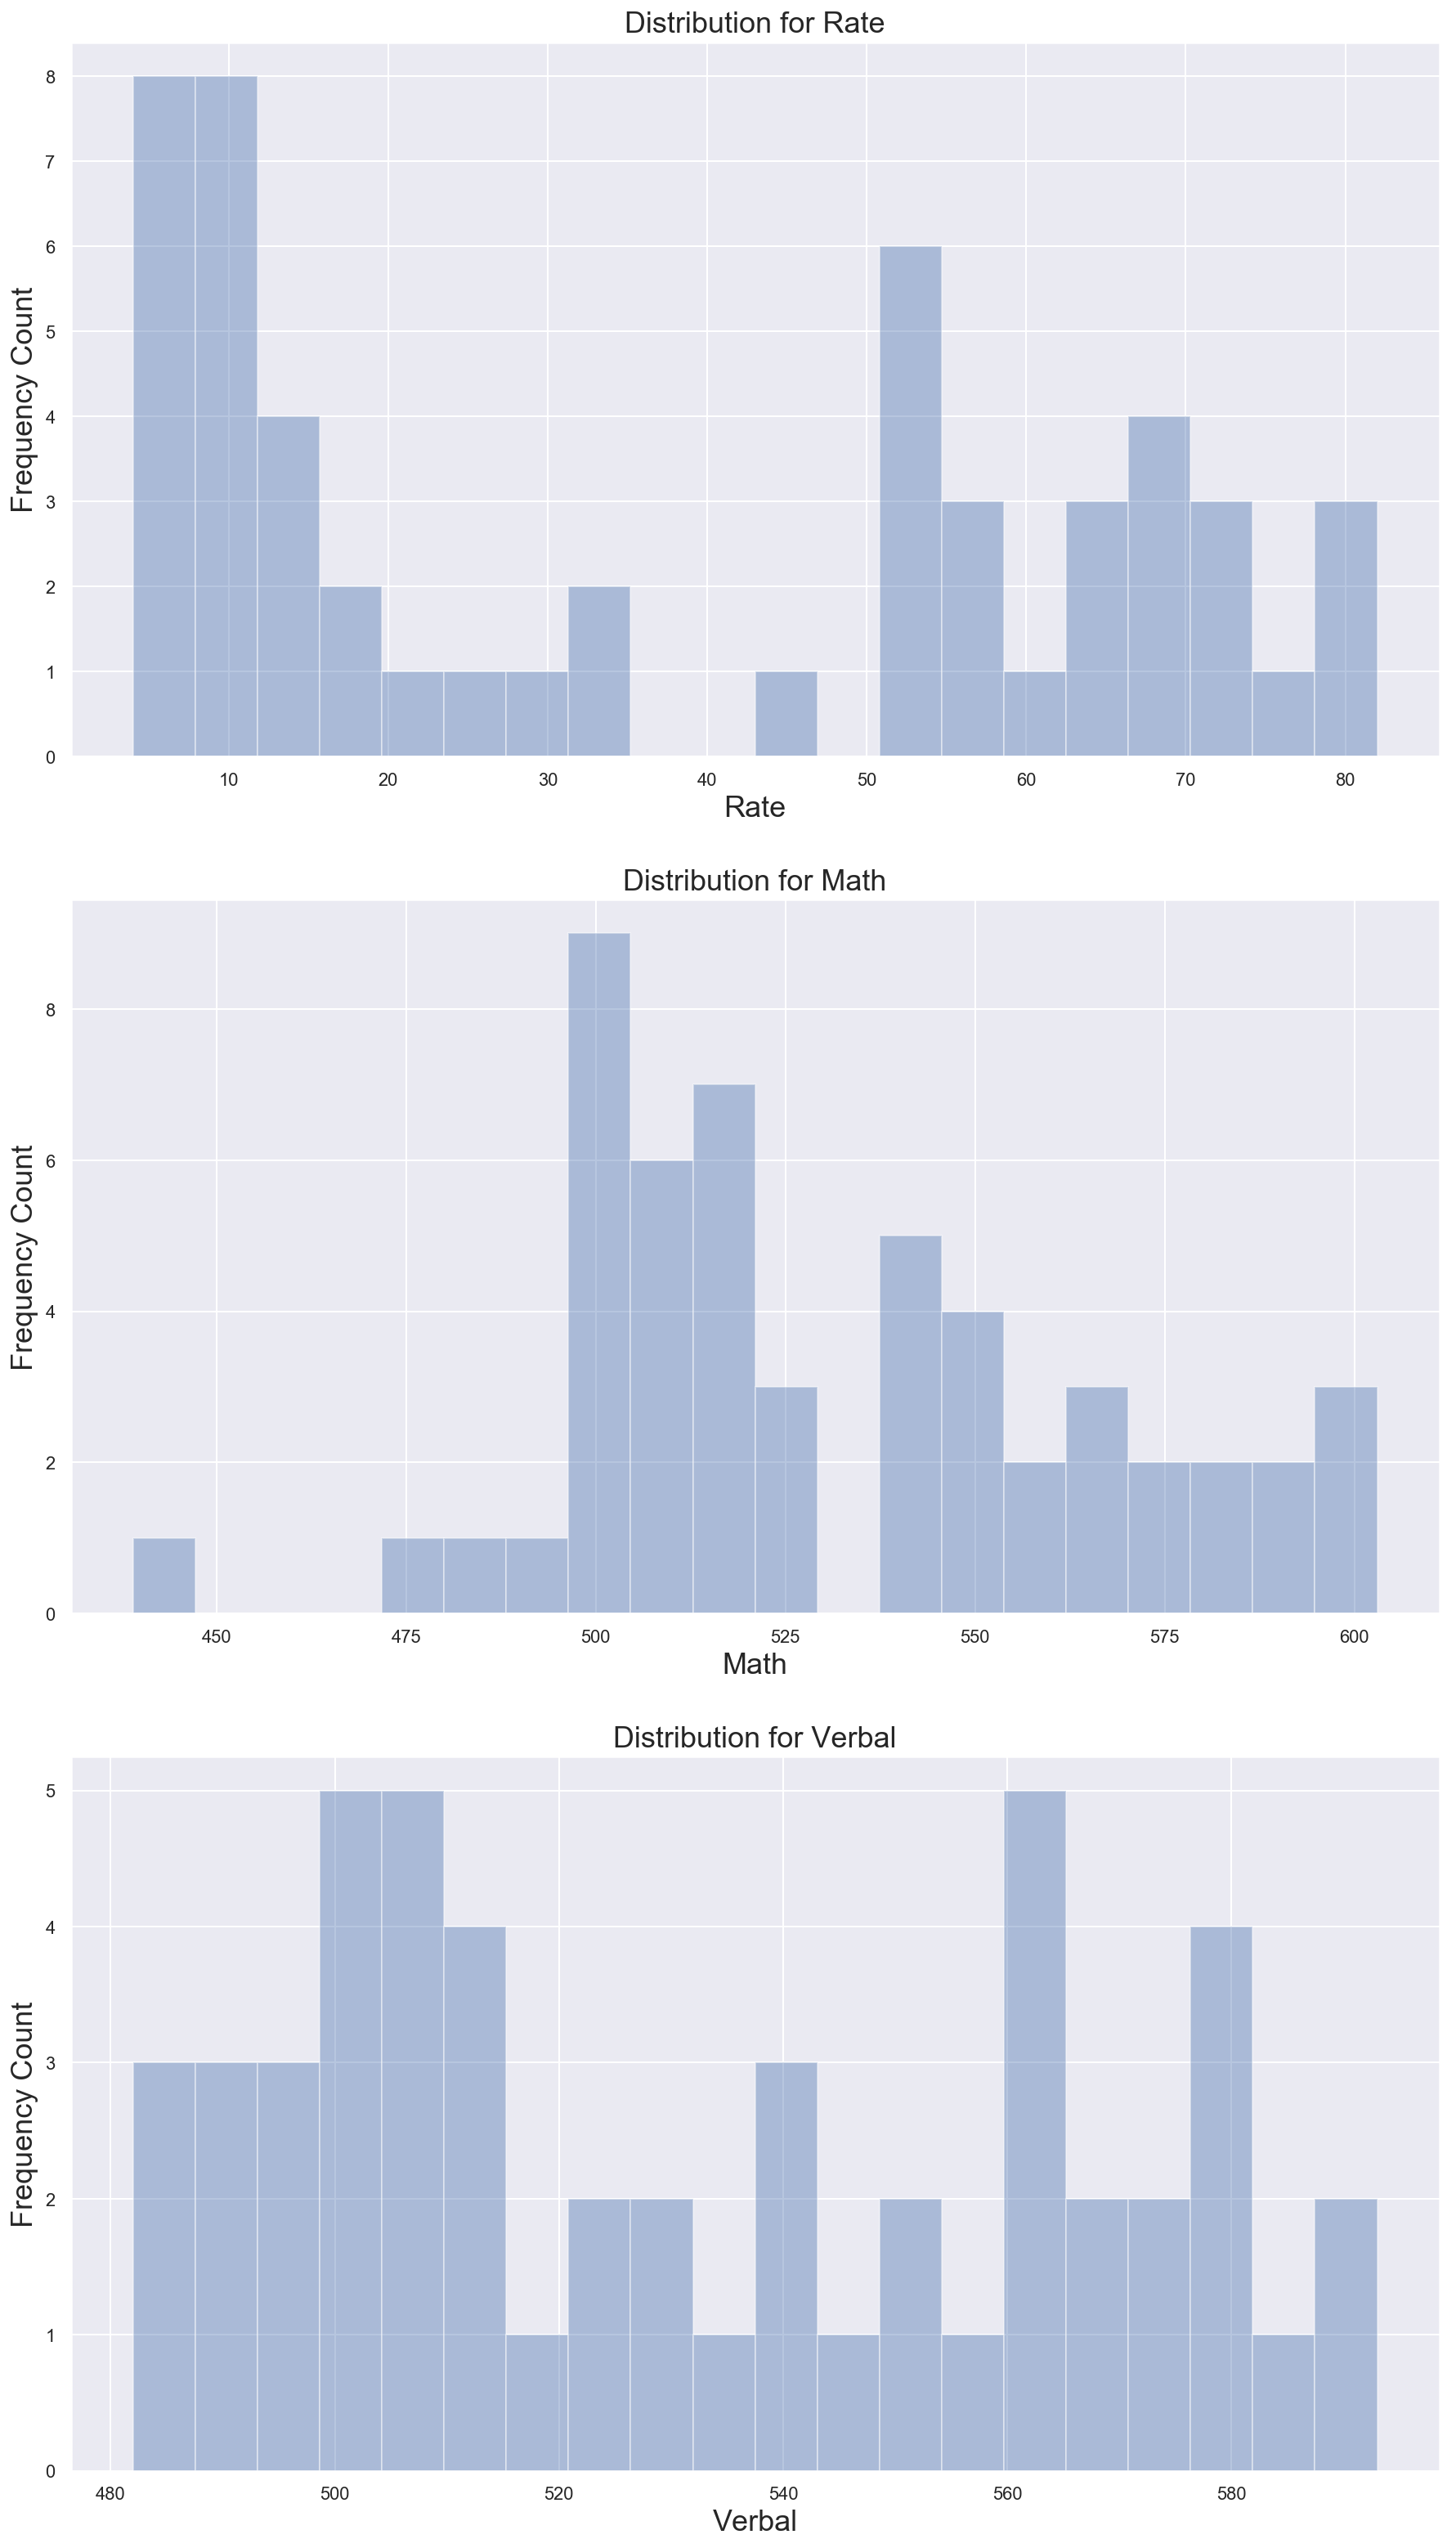

In [7]:
sns.set(style='darkgrid') # format the graph

bins_count = 20
fig, ax = plt.pyplot.subplots((3), figsize = (15,15))
plt.pyplot.subplots_adjust(top = 1.5) # to avoid overlapping titles and labels
for i, key in enumerate(['Rate', 'Math', 'Verbal']):
    g31 = sns.distplot(df_sat_scores_csv[key], kde = False, bins = bins_count, ax = ax[i])
    
    # format the graph
    title_name = 'Distribution for ' + key
    ax[i].set_ylabel('Frequency Count', fontsize = g_fontsize)
    ax[i].set_xlabel(key, fontsize = g_fontsize)
    ax[i].set_title(title_name, fontsize = g_fontsize)

    assert_graph_formats(g31)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

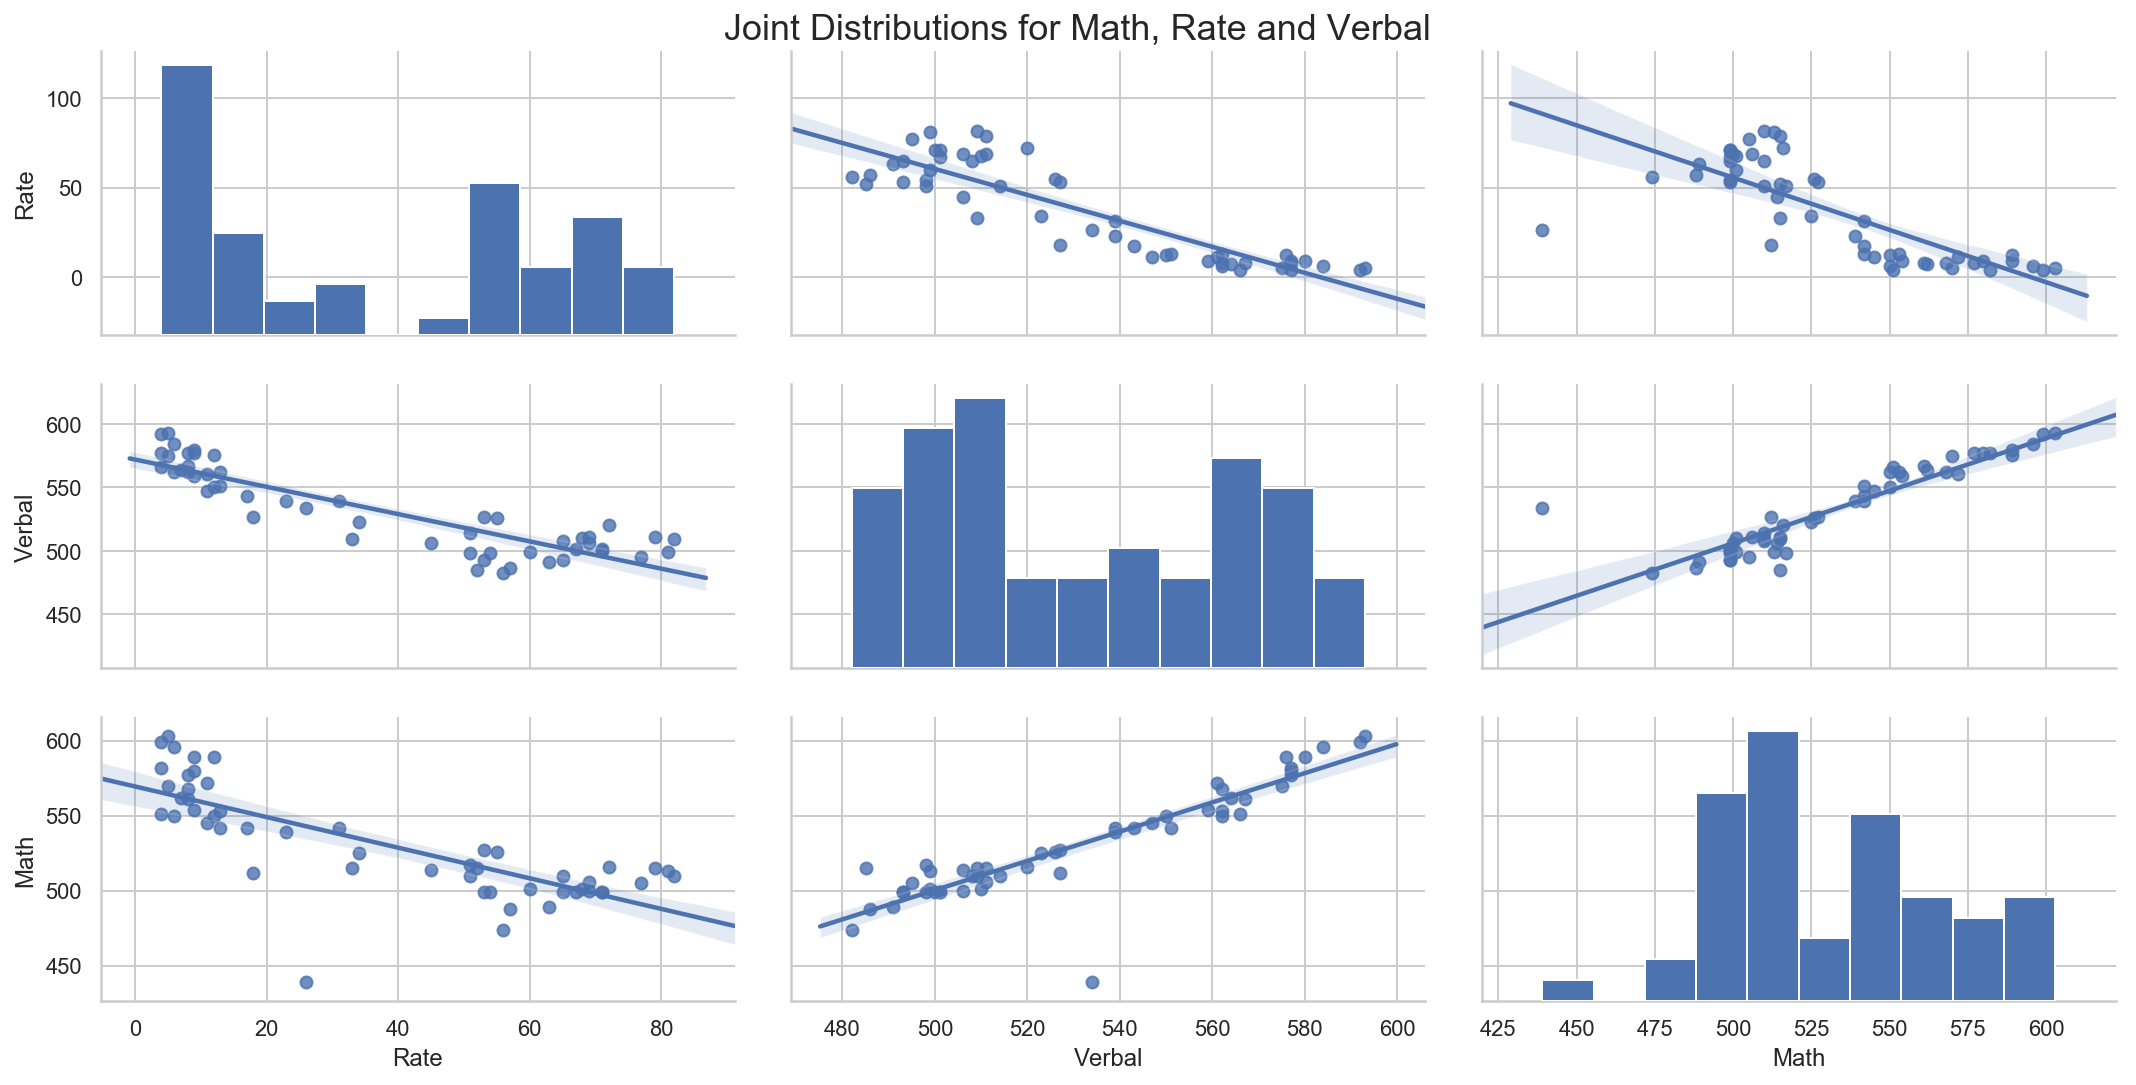

In [8]:
sns.set_style('whitegrid') # different way to set style

# kind='reg' => regression lines to illustrate positive / negative correlation
# aspect=2 => increases the size of pairplot
g32 = sns.pairplot(df_sat_scores_csv, aspect = 2, markers = 'o', kind = 'reg')

# subtitle => adds a title for the pairplot with the corresponding fontsize, fontweight and position
g32.fig.suptitle('Joint Distributions for Math, Rate and Verbal', fontsize = g_fontsize, y = 1, fontweight = 3);

<div class="alert alert-block alert-info">
<b>Question:</b> Explain what the visualization tells you about your data.
<br/>
<b>Answer:</b> This visualisation shows <i>Rate</i> is negatively correlated with <i>Math</i> and <i>Verbal</i>, while <i>Math</i> is positively correlated with <i>Verbal</i>.
</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

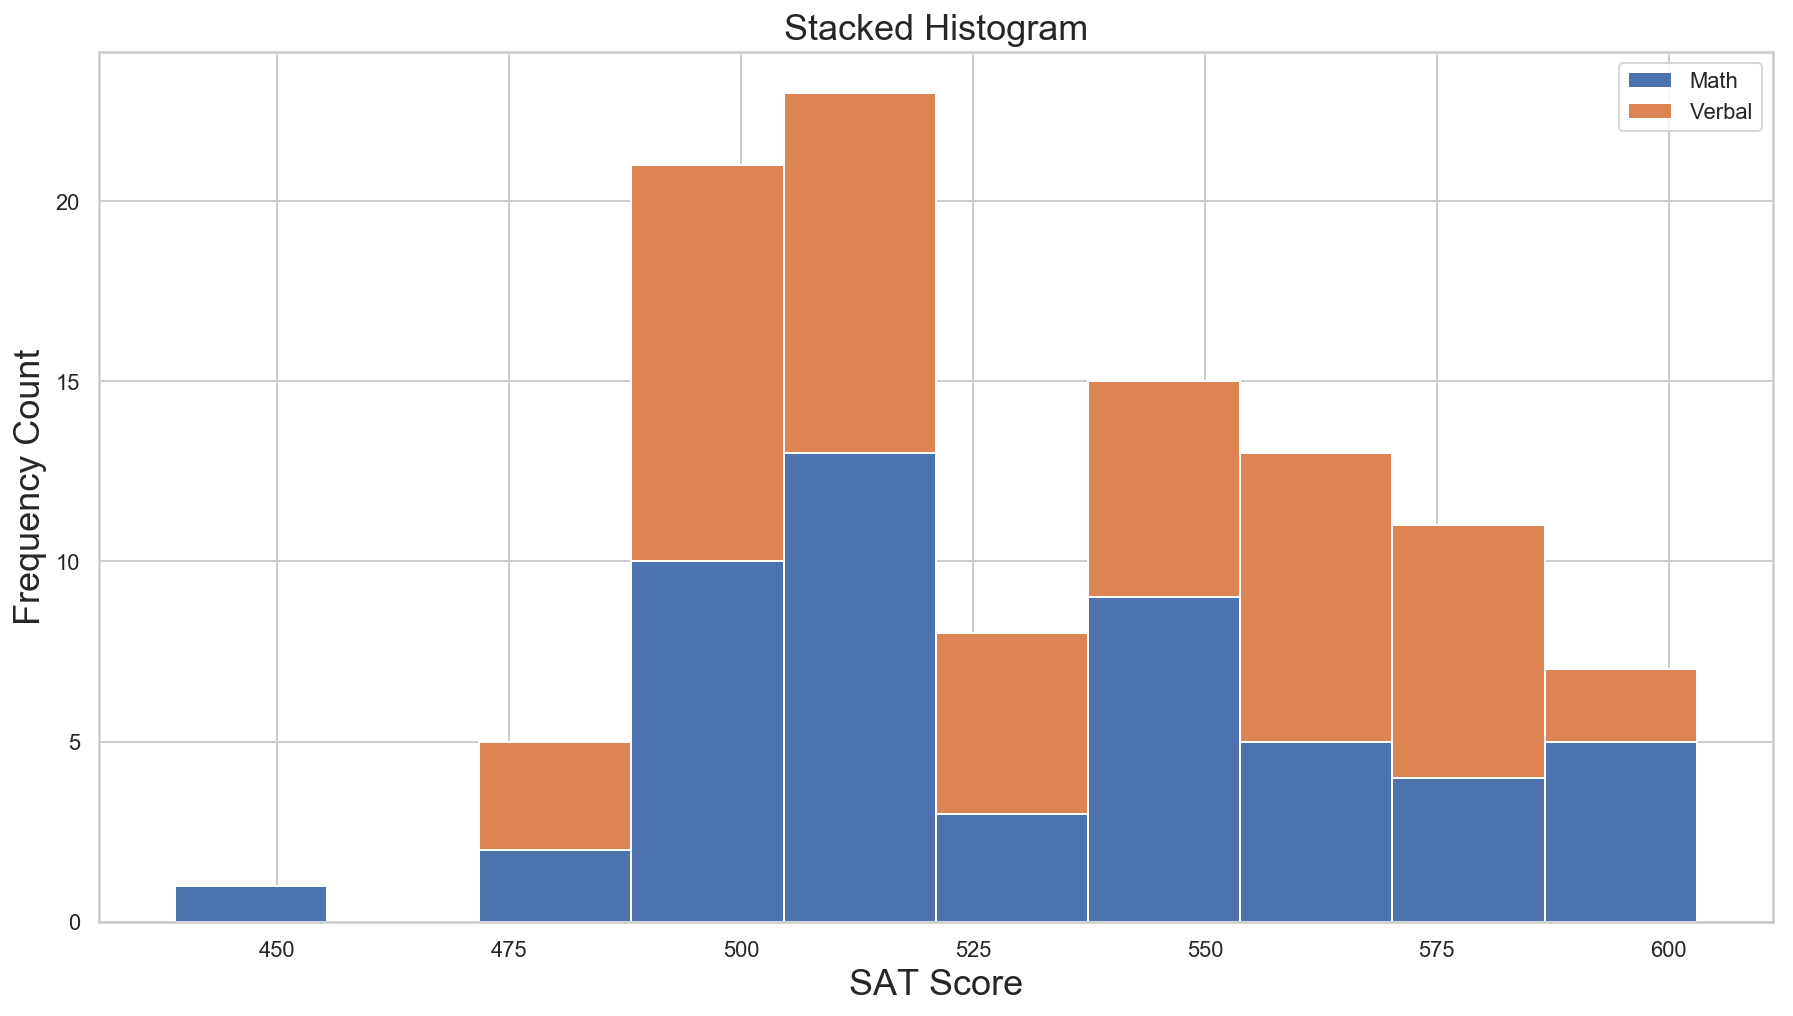

In [9]:
# 4.1 Plot a stacked histogram with Verbal and Math using pandas
df_subset_q4 = df_sat_scores_csv[['Math', 'Verbal']]
g41 = df_subset_q4.plot.hist(stacked = True, figsize = (15, 8))

# format graph 
g41.set_xlabel('SAT Score', fontsize = g_fontsize) # x axis label
g41.set_ylabel('Frequency Count', fontsize = g_fontsize) # y axis label
g41.set_title('Stacked Histogram', fontsize = g_fontsize); # title 

assert_graph_formats(g41)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

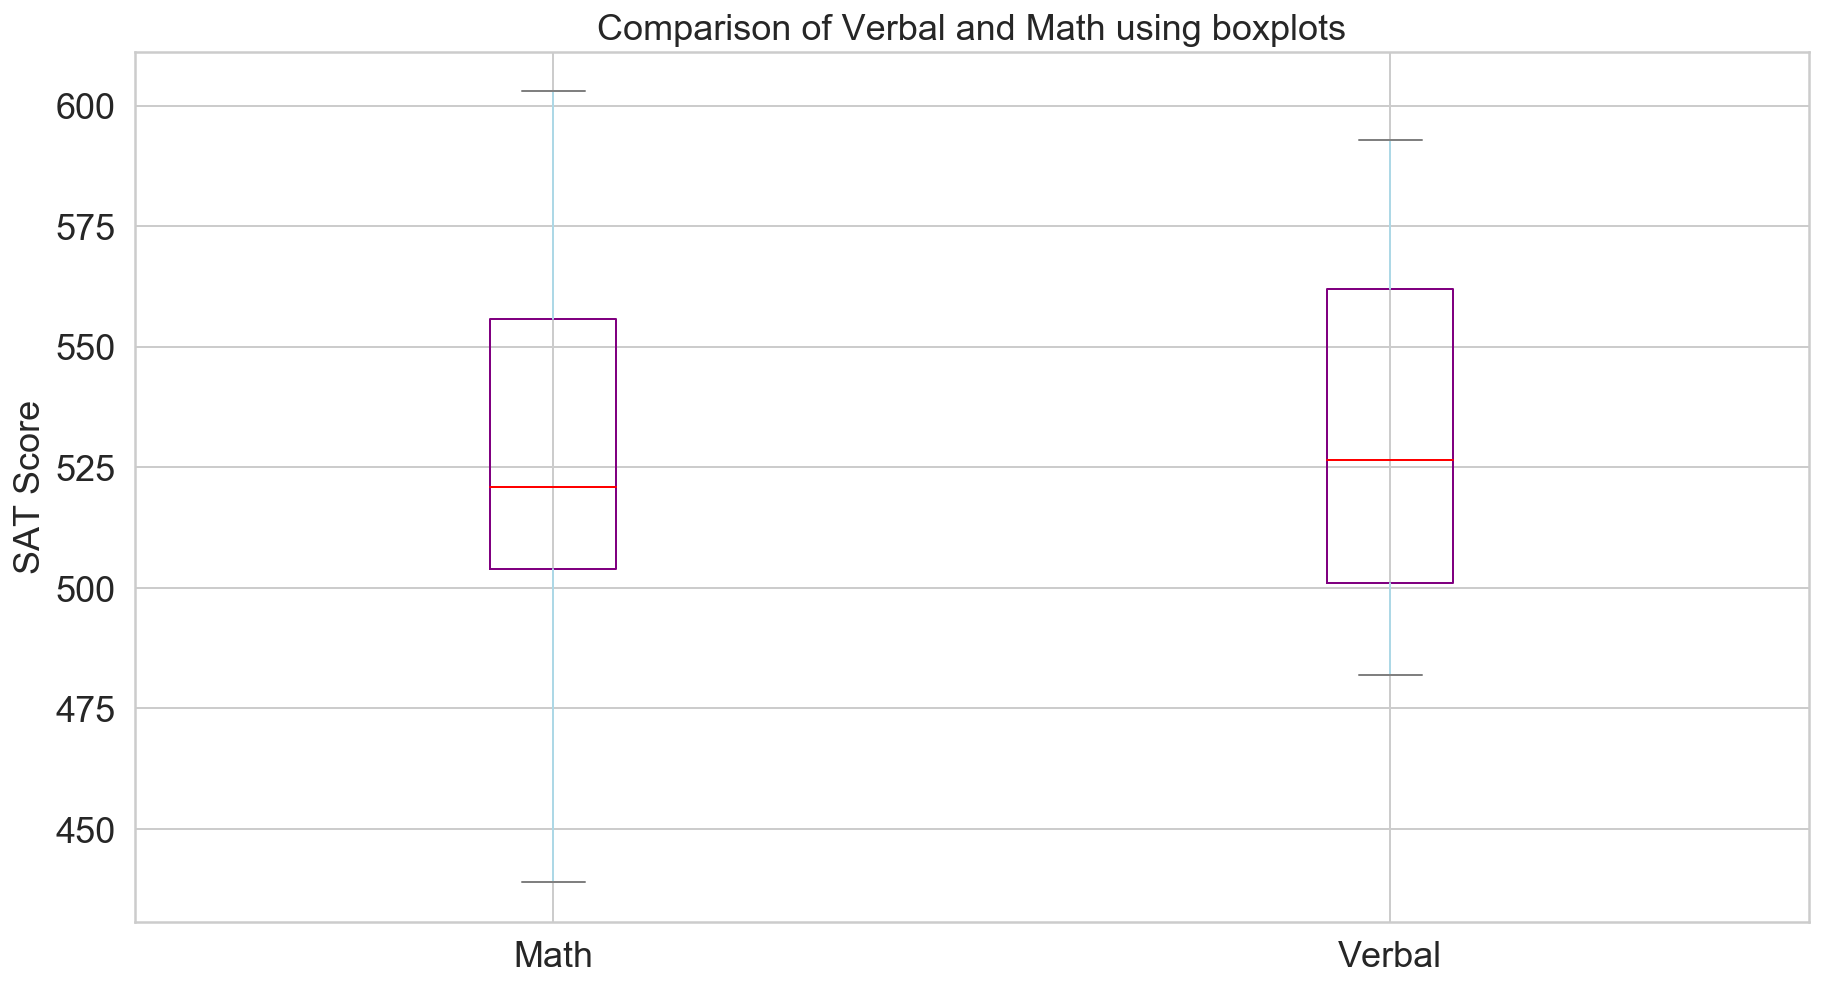

In [10]:
# 4.2 Plot Verbal and Math on the same chart using boxplots
color =  dict(
    boxes = 'Purple',
    whiskers = 'LightBlue',
    medians = 'Red', 
    caps = 'Gray'
)

g42 = df_subset_q4.plot.box(
    color = color, 
    fontsize = g_fontsize,
    sym = '+',
    figsize = (15, 8)
)

g42.set_title('Comparison of Verbal and Math using boxplots', fontsize = g_fontsize)
g42.set_ylabel('SAT Score', fontsize = g_fontsize)

assert_graph_formats(g41)

<div class="alert alert-block alert-info">
<b>Question:</b> What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
<br/>
<b>Answer:</b> Boxplot shows less detail as compared to histograms/scatterplots, which makes it easier to read.</div>

In [11]:
for column_name in ['Rate', 'Verbal', 'Math']:
    print(column_name)
    print(df_sat_scores_csv[column_name].describe(),'\n')

Rate
count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64 

Verbal
count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64 

Math
count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64 



<div class="alert alert-block alert-info">
<b>Question:</b> What's wrong with plotting a box-plot of <i>Rate</i> on the same chart as <i>Math</i> and <i>Verbal</i>?
<br/>
<b>Answer:</b> <i>Rate</i> has very different numbers(min: 4, max: 82) with <i>Math</i> and <i>Verbal</i> (min: 439, max: 603), which makes it illogical to be compared on the same y-axis values.</div>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [12]:
df_scores_vs_rate_q43 = pd.DataFrame(df_sat_scores_csv['Math']+df_sat_scores_csv['Verbal'])
df_scores_vs_rate_q43.columns = ['SAT Scores']
df_scores_vs_rate_q43['Rate'] = df_sat_scores_csv['Rate']
df_scores_vs_rate_q43.head()

,SAT Scores,Rate
0,1019,82
1,1012,81
2,1026,79
3,1000,77
4,1036,72


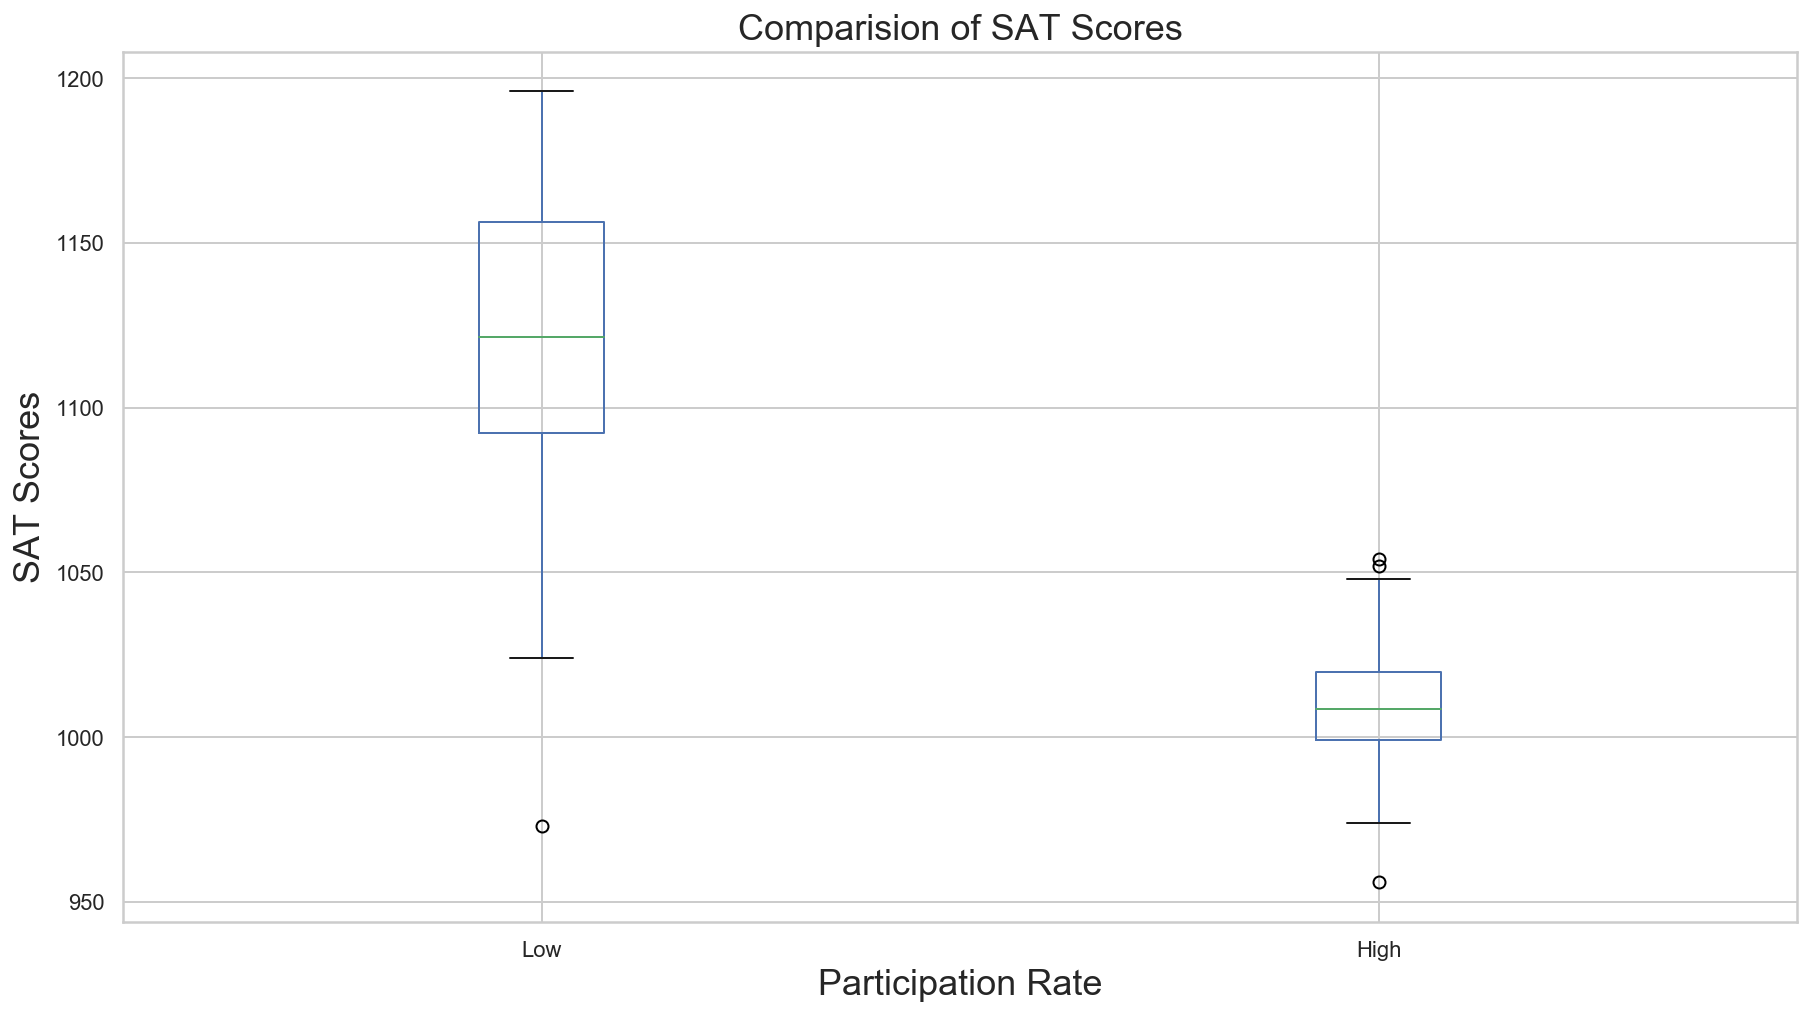

In [13]:
# Comparison of sat scores for low participation vs high participation rate
median_rate = df_scores_vs_rate_q43.apply(np.median)['Rate']

df_boxplot = pd.DataFrame({
    'Low': list(df_scores_vs_rate_q43[df_scores_vs_rate_q43['Rate'] <= median_rate]['SAT Scores']),
    'High': list(df_scores_vs_rate_q43[df_scores_vs_rate_q43['Rate'] > median_rate]['SAT Scores'])
})

g43 = df_boxplot.plot(kind='box', figsize = g_figsize)
g43.set_title('Comparision of SAT Scores', fontsize = g_fontsize)
g43.set_xlabel('Participation Rate', fontsize = g_fontsize)
g43.set_ylabel('SAT Scores', fontsize = g_fontsize)
assert_graph_formats(g43)

<div class="alert alert-block alert-info">
<b>Question:</b> Explain your rationale for the choices on the chart
<br/>
<b>Answer:</b> For states with low participation rate, we want to find out whether this affects the accuracy of the scores. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [14]:
condition_mean = df_sat_scores_csv['Verbal'] > np.mean(df_sat_scores_csv['Verbal'])
states_higher_than_mean = df_sat_scores_csv[condition_mean]
qf_print(states_higher_than_mean.head())
print('{n_states} states are above the mean.'.format(n_states = len(states_higher_than_mean)))

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553


24 states are above the mean.


<div class="alert alert-block alert-info">
<b>Question:</b> What does this tell you about the distribution of Verbal scores?

<br/>
<b>Answer:</b> Given that the total number of states is 52, the data is slightly skewed to the right (tail on the right). 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [15]:
condition_median = df_sat_scores_csv['Verbal'] > np.median(df_sat_scores_csv['Verbal'])
states_higher_than_median = df_sat_scores_csv[condition_median]
qf_print(states_higher_than_median.head())
print('{n_states} states are above the median.'.format(n_states = len(states_higher_than_median)))

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512


26 states are above the median.


<div class="alert alert-block alert-info">
<b>Question:</b> How does this compare to the list of states greater than the mean of Verbal scores? 

<br/>
<b>Answer:</b> There are 2 more states higher than median as compared to higher than mean. </div>

In [16]:
states_diff = df_sat_scores_csv[condition_median & ~condition_mean]
qf_print(states_diff.head())
print('{n_states} states are above mean and not above median'.format(n_states = len(states_diff)))

,State,Rate,Verbal,Math
19,WA,53,527,527
29,WV,18,527,512


2 states are above mean and not above median


<div class="alert alert-block alert-info">
<b>Question:</b> Why?
<br/>
<b>Answer:</b> This is because the data is slightly skewed. These states <i>WA</i> and <i>WV</i>, are above mean but not above median </div>

###### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
df_sat_scores_csv['Verbal - Math'] = df_sat_scores_csv['Verbal'] - df_sat_scores_csv['Math']
df_sat_scores_csv.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
# Your first DataFrame should be the 10 states with the greatest gap between Verbal and Math scores 
# where Verbal is greater than Math. It should be sorted appropriately to show the ranking of states.
df_q54_1 = df_sat_scores_csv[df_sat_scores_csv['Verbal - Math'] > 0].sort_values(by = 'Verbal - Math', ascending = False).head()

# Your second DataFrame will be the inverse: states with the greatest gap between Verbal and Math such that 
# Math is greater than Verbal. Again, this should be sorted appropriately to show rank.
df_q54_2 = df_sat_scores_csv[df_sat_scores_csv['Verbal - Math'] < 0].sort_values(by = 'Verbal - Math', ascending = True).head(10)

In [19]:
df_q54_1.head(3) # Verbal > Math 

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [20]:
df_q54_2.head(3) # Verbal < Math 

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


,Rate,Verbal,Math,Verbal - Math
Rate,1.00,-0.89,-0.77,-0.10
Verbal,-0.89,1.00,0.90,0.05
Math,-0.77,0.90,1.00,-0.39
Verbal - Math,-0.10,0.05,-0.39,1.00


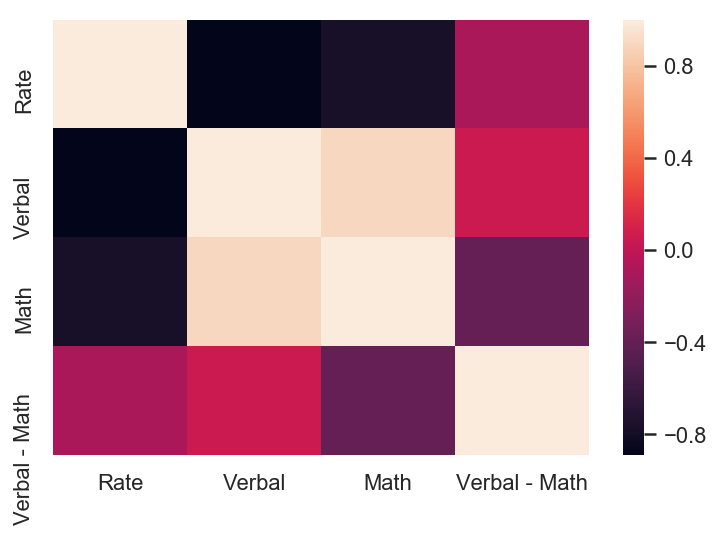

In [21]:
corr = df_sat_scores_csv.corr().round(2) # round to 2 dp as higher precision is not needed for comparison
sns.heatmap(corr)
corr

<div class="alert alert-block alert-info">
<b>Question:</b> What does the correlation matrix tell you?
<br/>
<b>Answer:</b><br/>
1. Highest linear (positive) correlated factors are Math and Verbal. (0.90) <br/>
2. Highest linear (negative) correlated factors are Rate and Verbal. (-0.89) <br/>
3. Lowest linear correlated factors are Verbal-Math and Verbal. (0.05)</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
df_sat_scores_csv.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<div class="alert alert-block alert-info">
<b>Question:</b> Write up what each of the rows returned by the function indicate.
<br/>
<b>Answer:</b><br/>
<i>count</i> returns number of non-null values for the column. <br/>
<i>mean</i> returns mean of all non-null values for the column. <br/>
<i>std</i> returns standard deviation of all non-null values for the column. <br/>
<i>min</i> returns minimum non-null values for the column. <br/>
<i>25%</i> returns 25th percentile of all non-null values for the column. <br/>
<i>50%</i> returns median of all non-null values for the column. <br/>
<i>75%</i> returns 75th percentile of all non-null values for the column. <br/>
<i>max</i> returns maximum non-null values for the column. <br/>


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

,Rate,Verbal,Math,Verbal - Math
Rate,745.39,-804.36,-760.80,-43.55
Verbal,-804.36,1104.65,1077.15,27.50
Math,-760.80,1077.15,1297.08,-219.93
Verbal - Math,-43.55,27.50,-219.93,247.43


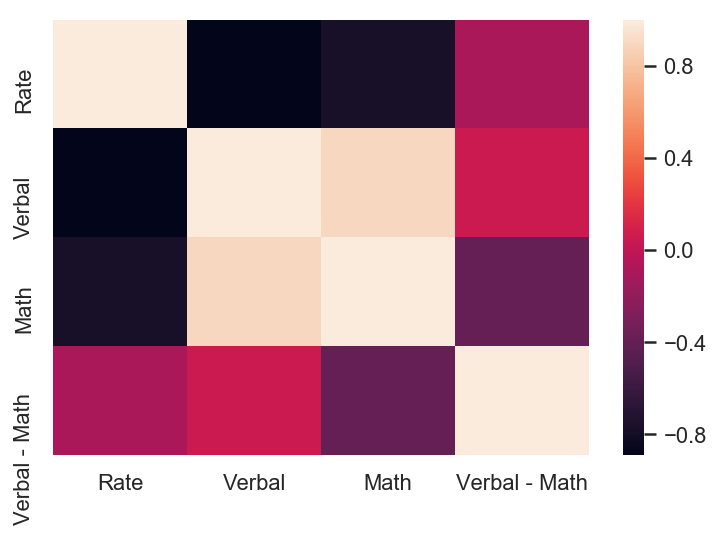

In [23]:
cov = df_sat_scores_csv.cov().round(2) 
sns.heatmap(corr)
cov

<div class="alert alert-block alert-info">
<b>Question:</b> Describe how the covariance matrix is different from the correlation matrix.
<br/>
<b>Answer:</b>Correlation matrix is the normalised form of a convariance matrix.

In [24]:
df_stds = df_sat_scores_csv.std()
cov_transform = cov.copy()
for key1 in cov.keys():
    for key2 in cov:
        cov_transform[key1][key2] = cov_transform[key1][key2] / (df_stds[key1]*df_stds[key2])
cov_transform.round(2)

,Rate,Verbal,Math,Verbal - Math
Rate,1.00,-0.89,-0.77,-0.10
Verbal,-0.89,1.00,0.90,0.05
Math,-0.77,0.90,1.00,-0.39
Verbal - Math,-0.10,0.05,-0.39,1.00


<div class="alert alert-block alert-info">
<b>Question:</b> What is the process to convert the covariance into the correlation?
<br/>
<b>Answer:</b> By dividing the covariance values by standard deviation of x * standard deviation of y, we get its correlation. The code block above shows the transformation of a covariance matrix to a correlation matrix.

<div class="alert alert-block alert-info">
<b>Question:</b> Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
<br/>
<b>Answer:</b> That is because with a scale of -1 to 1 instead of -infinity to finity, it is easier to compare bivariate correlation for mulitple factors.
</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [25]:
path_drug = 'drug-use-by-age.csv'
df_drug = pd.read_csv(path_drug)
df_drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [26]:
df_drug.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

<div class="alert alert-block alert-info">
<b>Question:</b> Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?
<br/>
<b>Answer:</b> <br/>
<u>Observations</u> <br/>
1. We can see that some columns are labelled '-' which caused the types for each column to be object instead of float. <br/>Thus, we need to clean the data. '-' should be changed to NaN.<br/>
2. All values should be float except for column_name == 'n' (integer). <br/>
3. Age range also does not seem consistent - will need to be careful about this when analysing the data.<br/>
</div>

In [27]:
# clean data
def clean_cell(cell):
    ''' Some values are '-', should be changed to NaN '''
    if cell == '-':
        return np.NAN
    try:
        # some variables should be float, not object such as: 
        # inhalant-frequency, meth-frequency, cocaine-frequency, crack-frequency

        if type(cell) != int:
            return float(cell)
    except:
        pass
    return cell

df_drug = df_drug.applymap(clean_cell)
df_drug.info() # check the dataframe types after cleaning the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [28]:
# what does the data mean? from source: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age
# xx-use: Percentage of those in an age group who used xx in the past 12 months
# xx-frequency: Median number of times a user in an age group used alcohol in the past 12 months
# prevention is better than cure, so we want to avoid people's exposure to substances, and thus uses 'use' instead of 'freq'

# following guides for doing eda: https://www.kaggle.com/nguyentp/common-steps-to-do-eda
# 1. what is the shape of the data?
print('shape of the data is:', df_drug.shape)
df_drug.head()

shape of the data is: (17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


<div class="alert alert-block alert-info">
Number of data points seem to be very little, but the dataframe actually contains aggregated results instead of individual data points. 
</div>

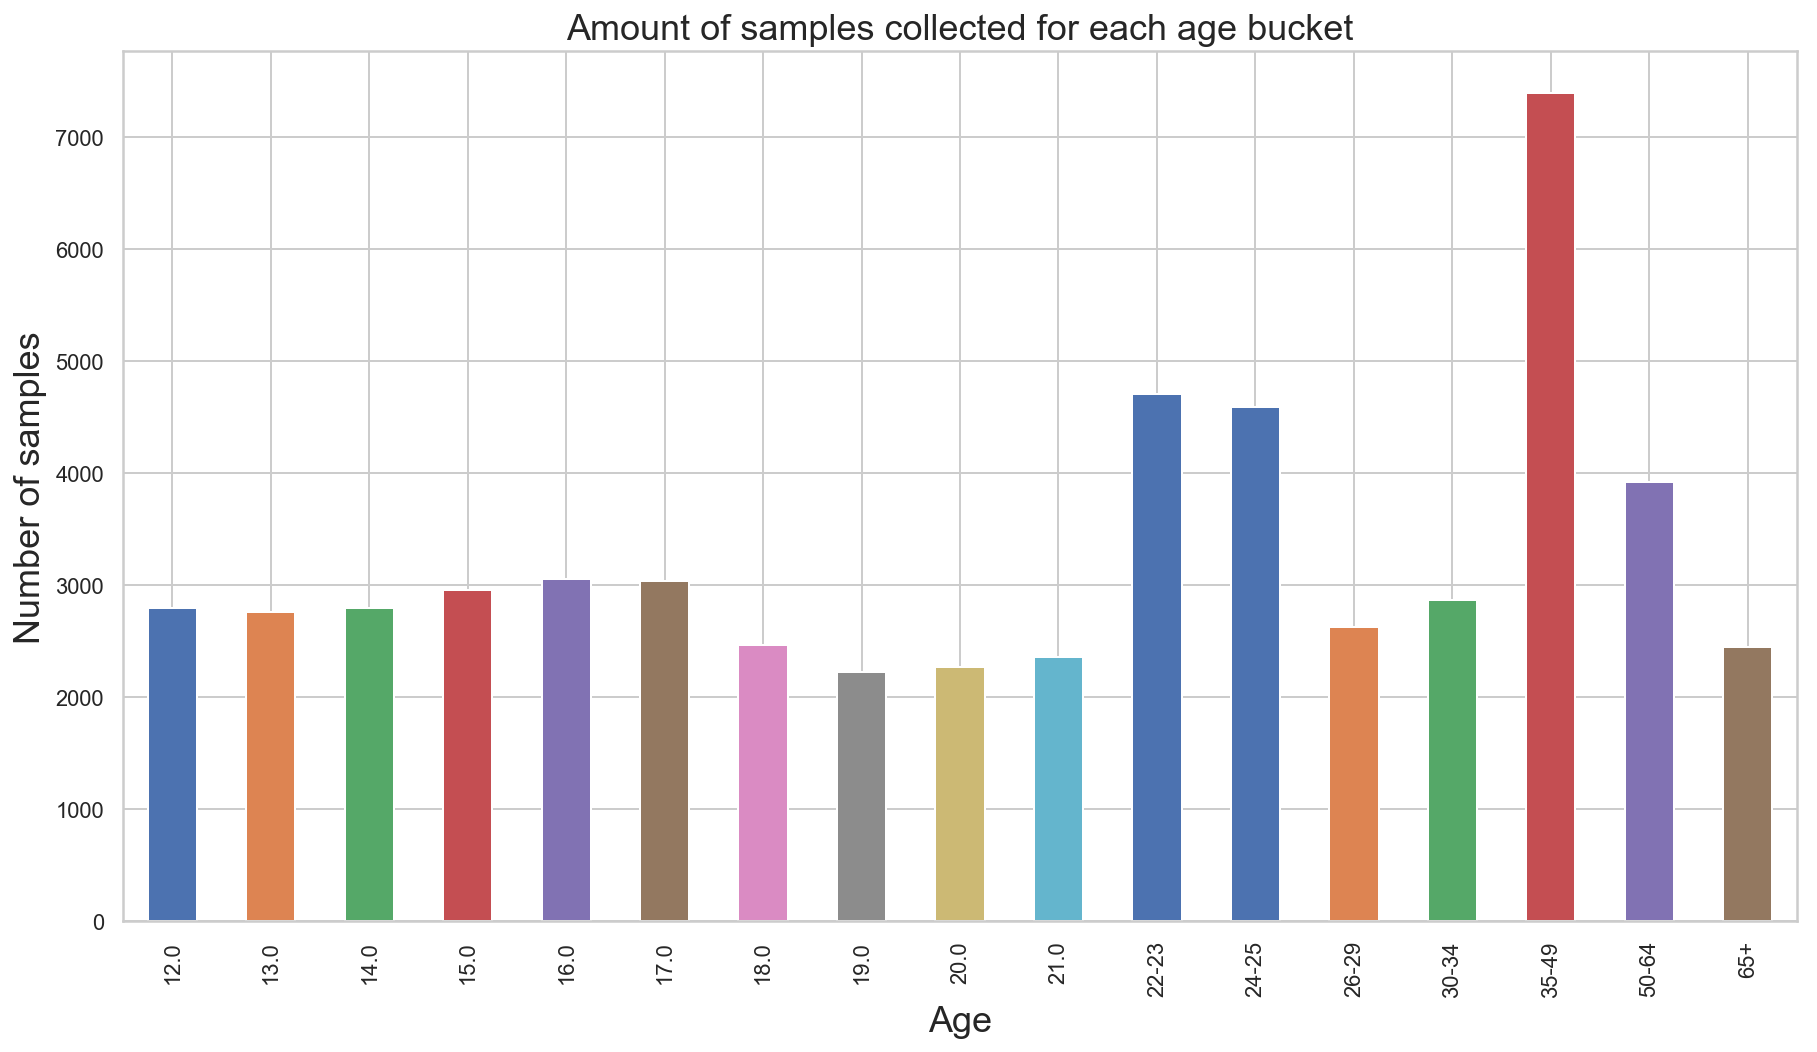

In [29]:
# 2. what much data are there for each age group?
g72_1 = df_drug.plot(x = 'age', y = 'n', kind = 'bar', legend = False, figsize = g_figsize)
g72_1.set_xlabel('Age', fontsize = g_fontsize)
g72_1.set_ylabel('Number of samples', fontsize = g_fontsize)
g72_1.set_title('Amount of samples collected for each age bucket', fontsize = g_fontsize)
assert_graph_formats(g72_1)

In [30]:
# as the amount of samples collected are more consistent for ages 12 - 21, i will use these ages as a subset.
# Business problem: how do we prevent teenagers from taking alcohol / drugs?

def subset_rules(x):
    if type(x) == str: # because those with float values are ages 12 - 21
        return False
    return True

df_drug_teens = df_drug[df_drug['age'].apply(subset_rules)]
df_drug_teens

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [31]:
# color_chosen = sns.choose_colorbrewer_palette('q', as_cmap= False) # can choose the color here

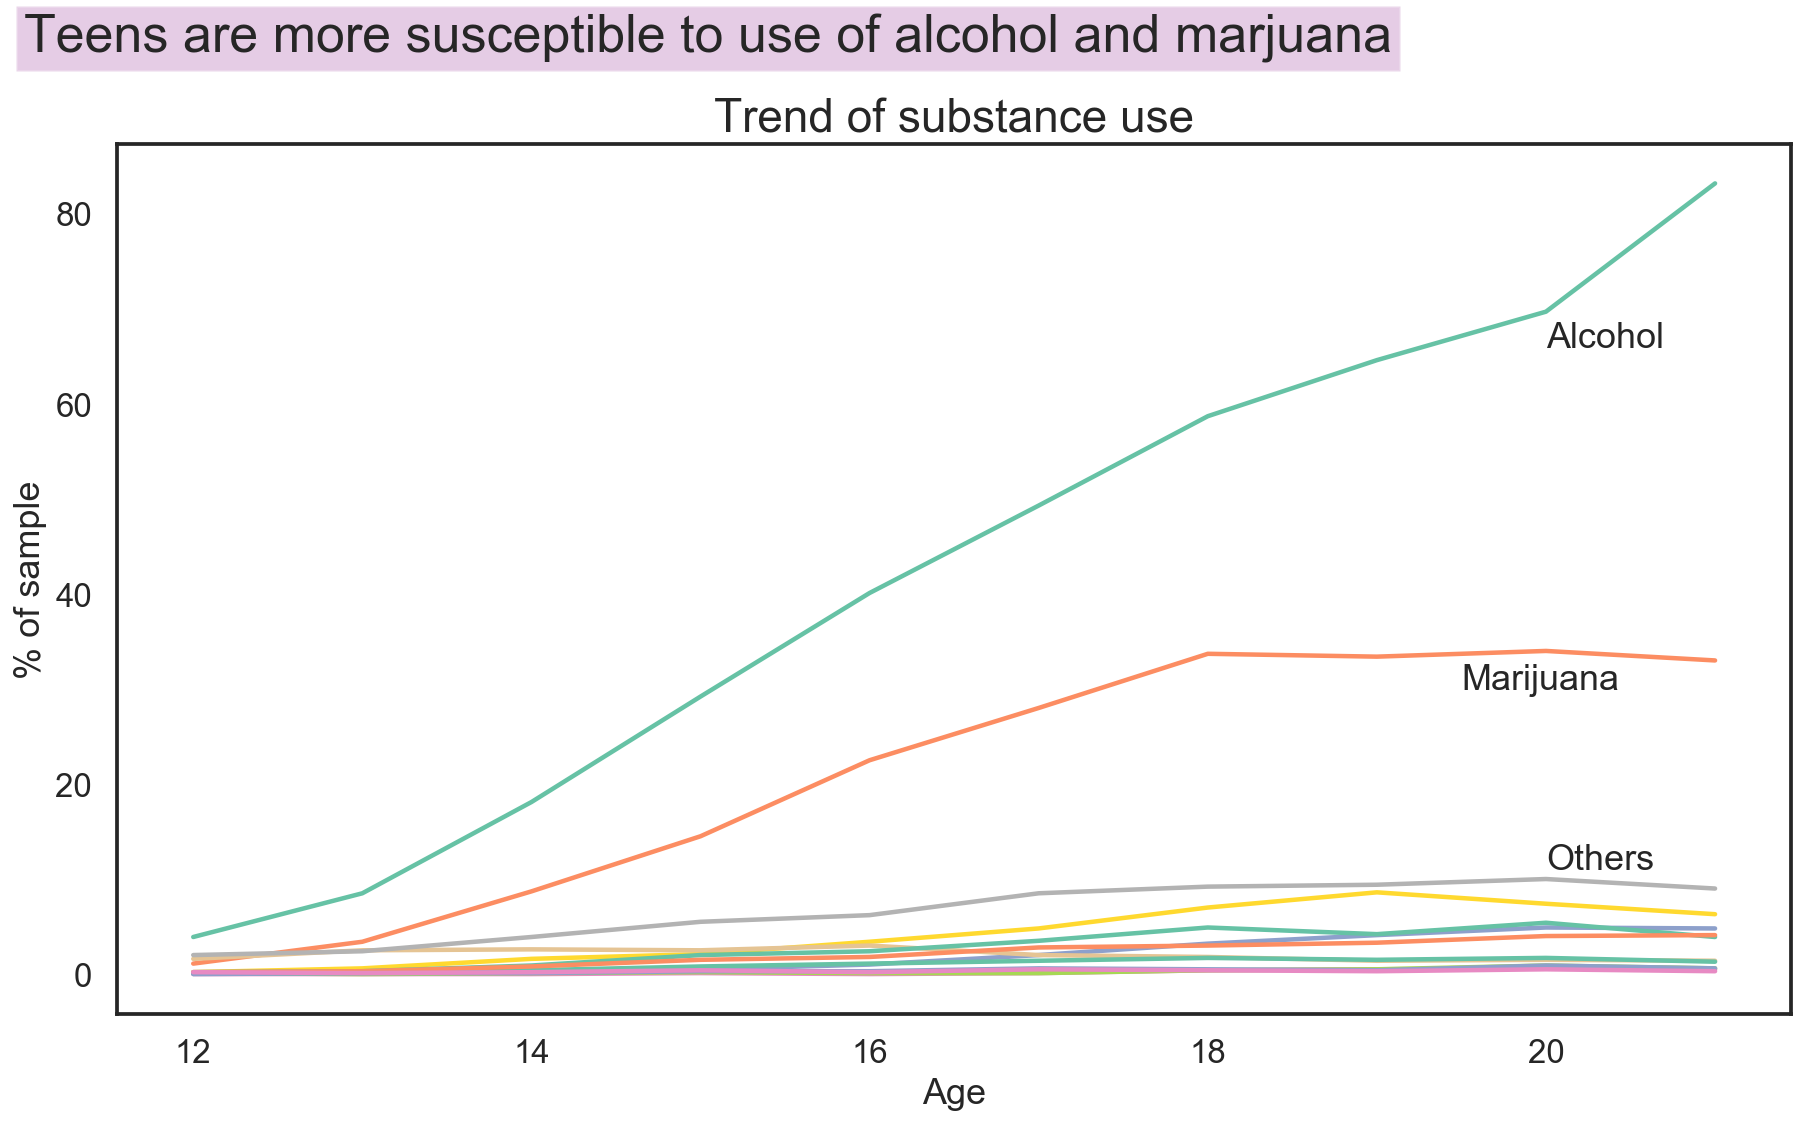

In [32]:
# 1. What kind of substance has higher chances of being used by teenagers as they grow older?
color_chosen = [(0.3999999999999998, 0.7607843137254903, 0.6470588235294119), (0.9882352941176471, 0.5529411764705883, 0.38431372549019605), (0.5529411764705885, 0.627450980392157, 0.7960784313725489), (0.9058823529411764, 0.5411764705882354, 0.7647058823529411), (0.6509803921568627, 0.8470588235294119, 0.3294117647058823), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862744, 0.7686274509803921, 0.5803921568627453), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254), (0.3999999999999998, 0.7607843137254903, 0.6470588235294119)]
sns.set_style('white')
sns.set_context('talk') # increases size of label
sns.set_palette(color_chosen)
keys = [key for key in df_drug_teens.columns if 'use' in key]
g72_2 = df_drug_teens.plot(y = keys, x = 'age', kind='line', figsize = g_figsize, legend = False) # alcohol and marijuana are the 2 high risk key substances 
g72_2.set_title('Trend of substance use', fontsize = g_fontsize + 5)
g72_2.set_ylabel('% of sample', fontsize = g_fontsize)
g72_2.set_xlabel('Age', fontsize = g_fontsize)
g72_2.text(
    11, 97,
   'Teens are more susceptible to use of alcohol and marjuana', 
   fontsize = g_fontsize + 8, 
   bbox=dict(
       facecolor='purple', 
       alpha=0.2
   )
) #add interperation of graph in figure

# annotations instead of legend as legend makes the graph messy
g72_2.text(20, 66, 'Alcohol', fontsize = g_fontsize)
g72_2.text(19.5, 30, 'Marijuana', fontsize = g_fontsize)
g72_2.text(20, 11, 'Others', fontsize = g_fontsize)
assert_graph_formats(g72_2)

<div class = 'alert alert-info'>From the graph <i>Trend of substance use</i>, I can infer that alcohol and marijuana has the highest increase in % use as teenagers grow older. Alcohol-use increased from 3.9% to 83%, while marijuana increased from 1% to 33%.<br/><br/>One way to use this inference is for prevention of drug use. We can show them the ingredients and negative impacts of <b>alcohol</b> and <b>marijuana</b>, in a bid to prevent them from using it. </div>

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

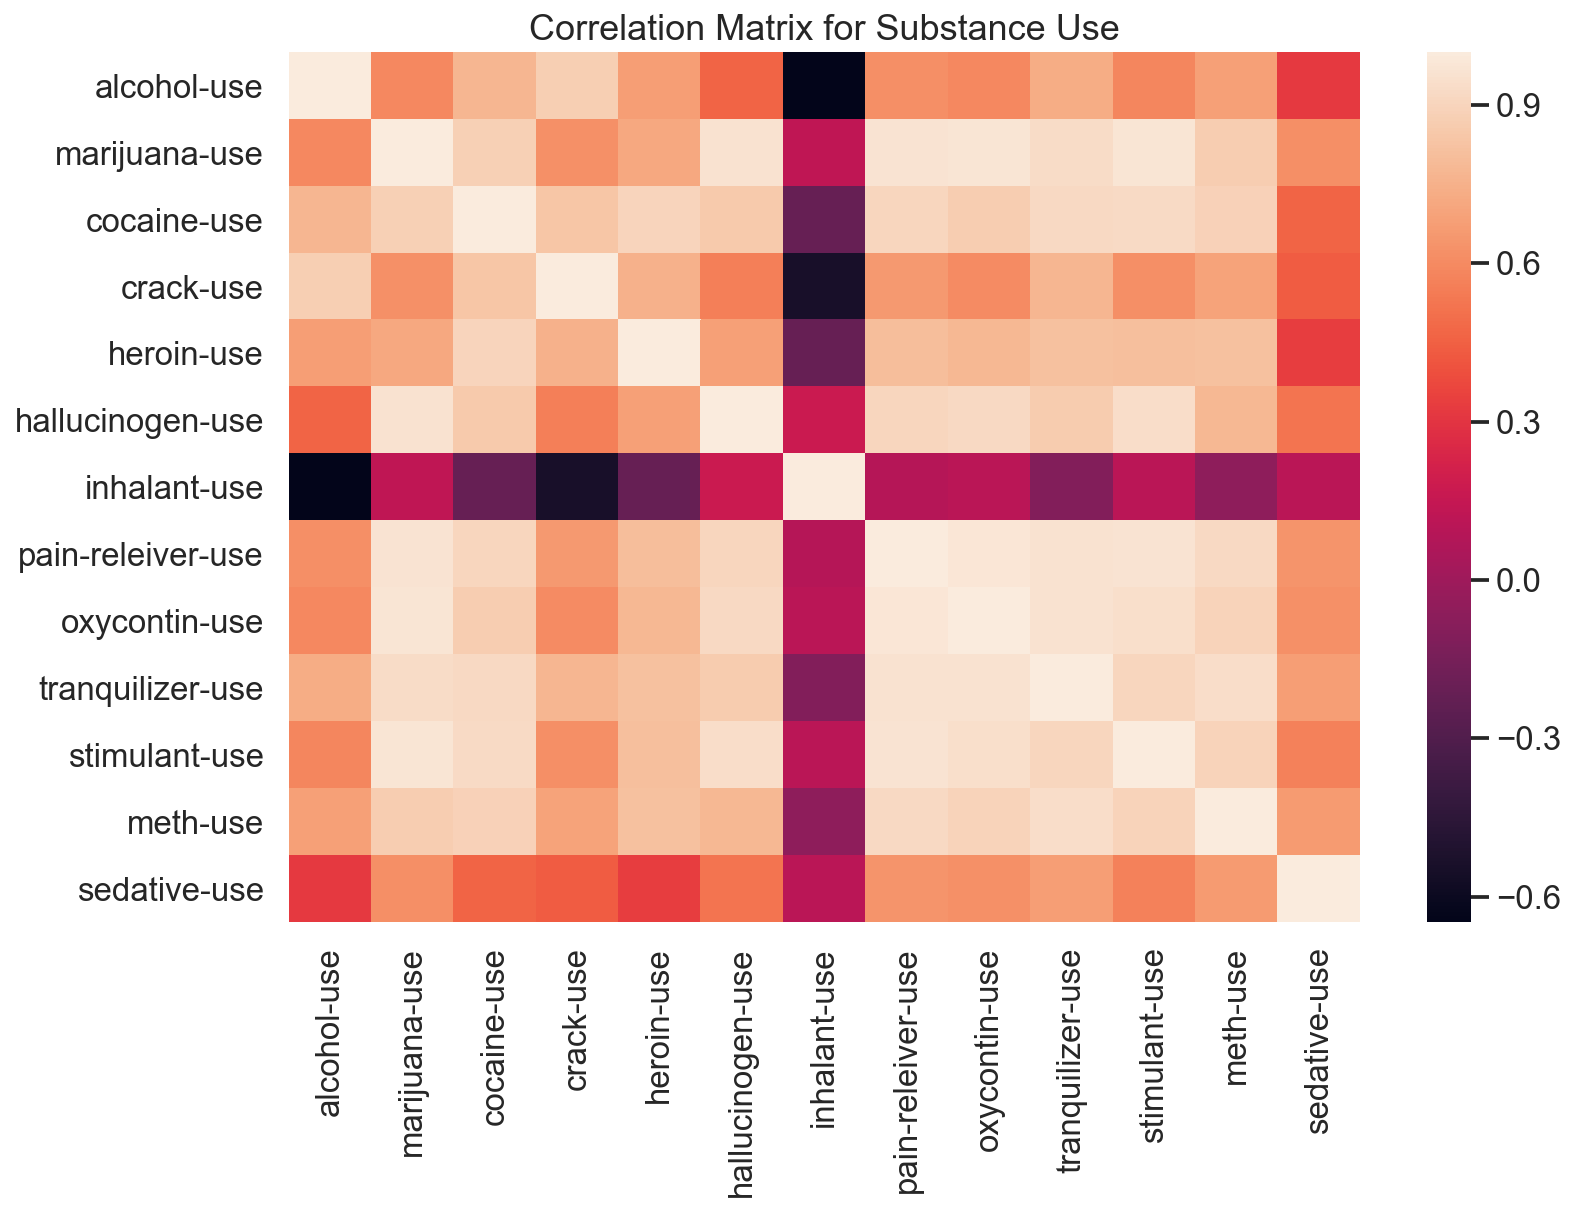

In [33]:
'''
1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
My EDA question: there are certain  group of related drugs, 
and banning one drug will not help in reducing number of drug addicts.

For example, if i use crack, but i cannot find crack, i will use cocaine as a substitute drug.

Therefore, if i am the mayor trying to reduce number of drug addicts,
banning certain drug(s) wont work because the addicts have familiar substitutes/alternate drugs.
'''

'''
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
If my hypothesis is true, i will report what are the clusters of similar drugs. 
'''

'''
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
What kind of visualisation should i use? 
'''
fig, ax = plt.pyplot.subplots(figsize = (12,8))
df_drug_use_columns =[key for key in df_drug.columns if 'use' in key]
df_drug_use_corr = df_drug[df_drug_use_columns].corr()
sns.heatmap(df_drug_use_corr).set_title('Correlation Matrix for Substance Use');

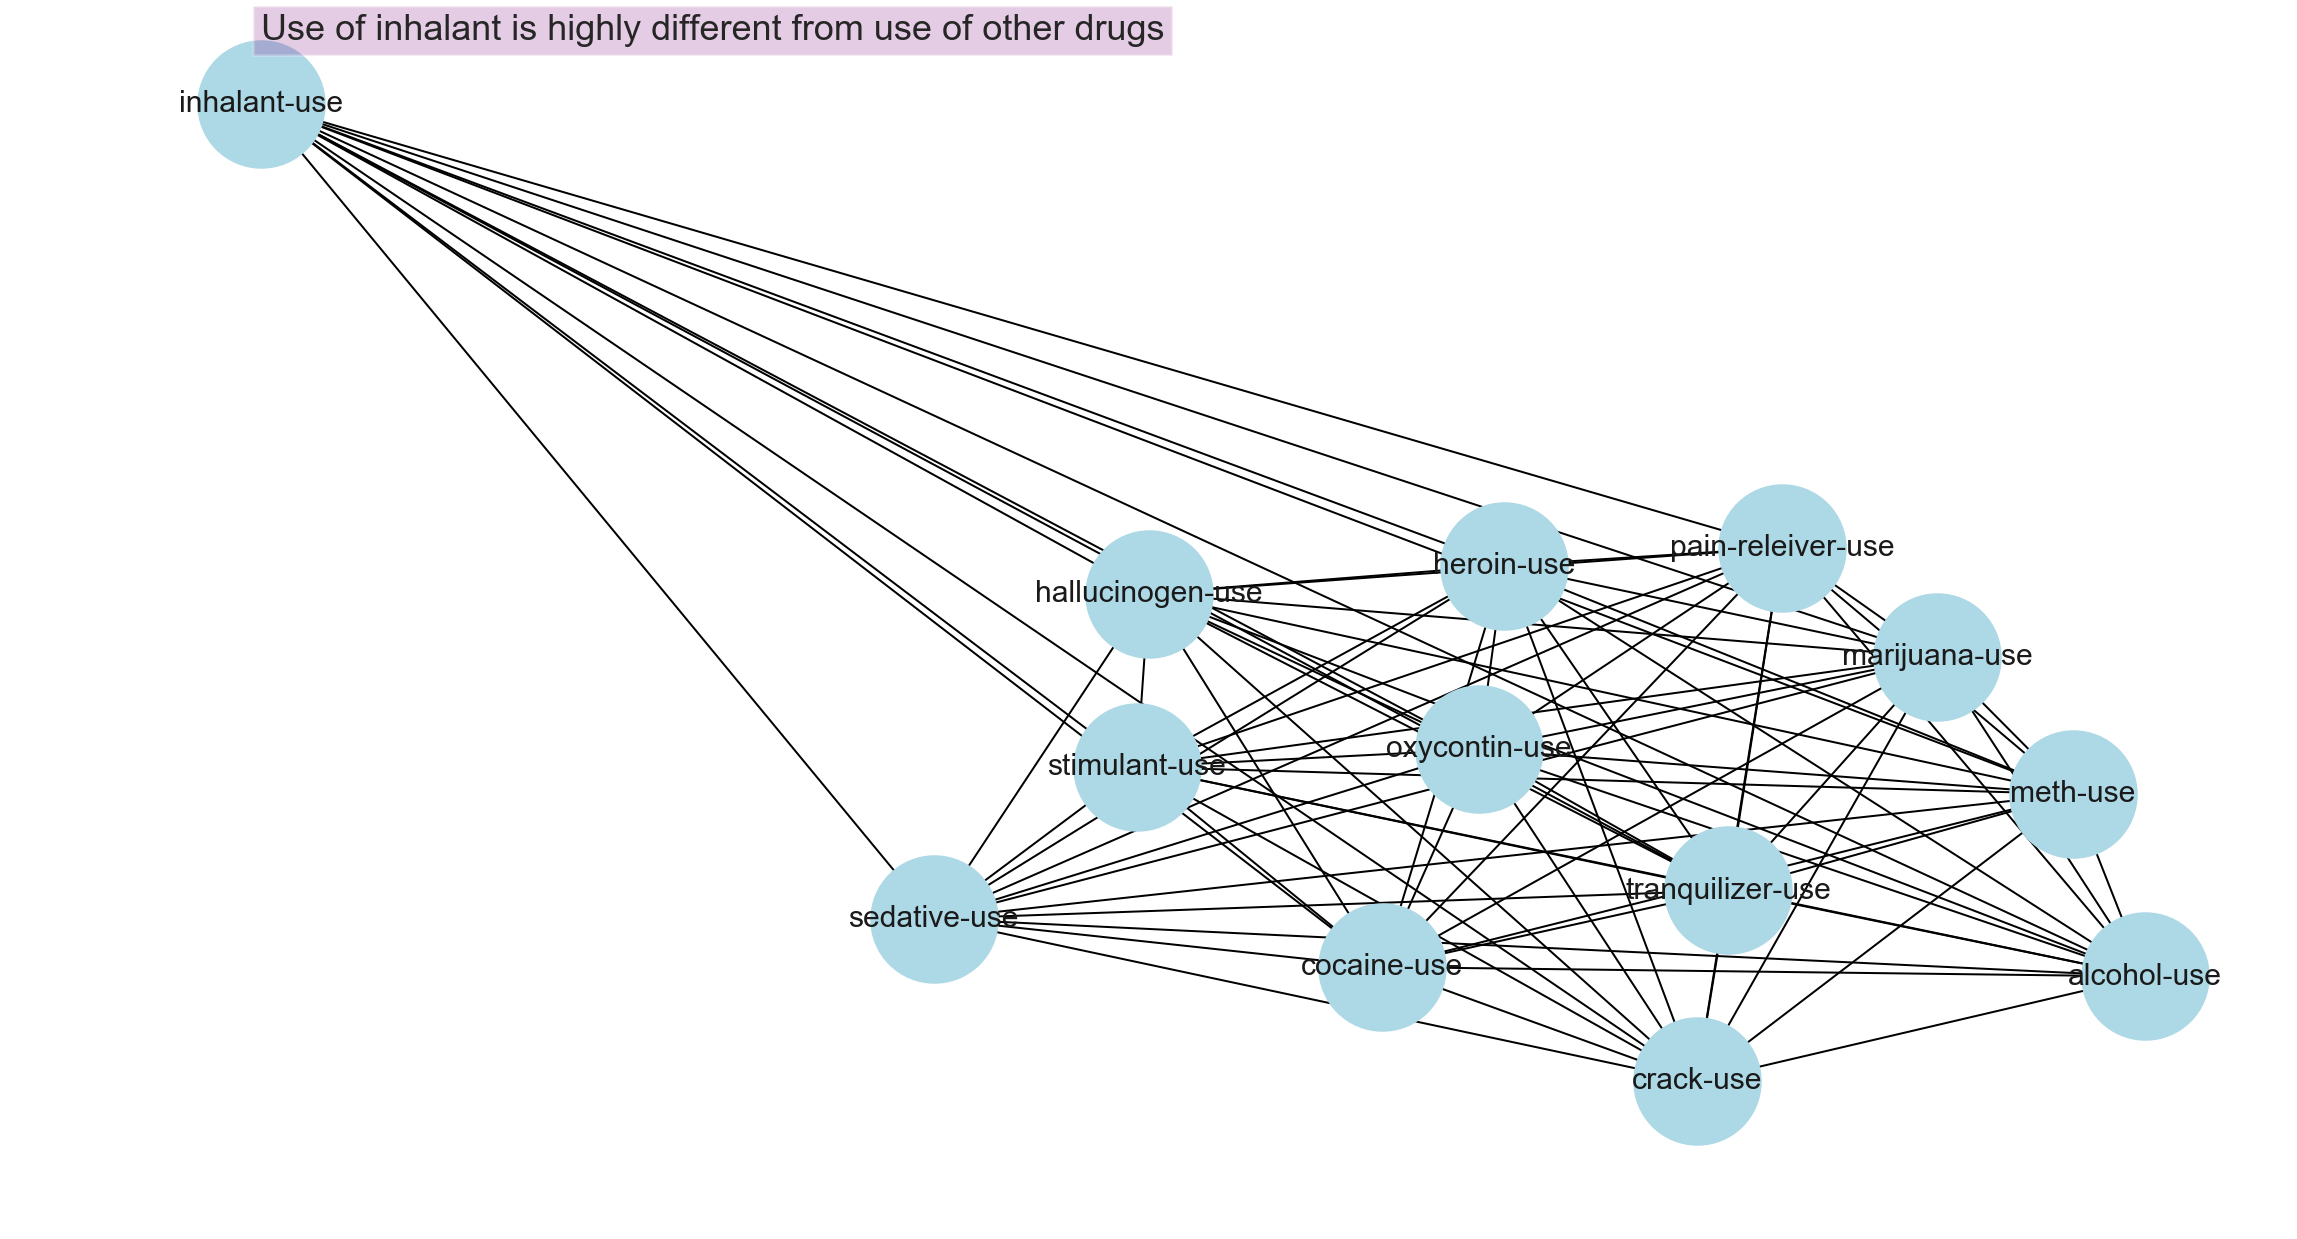

In [34]:
def plot_network_diagram(df_drug_use_corr, k, iterations, scale):
    import networkx as nx
    plt.pyplot.figure(3,figsize = g_figsize) 
    # get top correlation (whether neg or pos)
    # change all diagonal elements from 1 to 0 - they are not real correlation.
    for i in df_drug_use_corr.keys():
        for j in df_drug_use_corr.keys():
            if i == j:
                df_drug_use_corr.loc[i,j] = 0
    G=nx.from_pandas_adjacency(df_drug_use_corr[df_drug_use_corr > 0])
    pos = nx.spring_layout(G, k=k, iterations=iterations, scale=scale)
    nx.draw(G, pos = pos, with_labels=True, node_color='lightblue', node_size=4000, edge_color='black', linewidths=1, font_size=15)
    return pos
pos = plot_network_diagram(df_drug_use_corr, k=0.5, iterations=50, scale=1)
x, y = pos['inhalant-use']
plt.pyplot.text(
    x, y+0.1,
    'Use of inhalant is highly different from use of other drugs',
    fontsize = g_fontsize,
    bbox=dict(
       facecolor='purple', 
       alpha=0.2
   )
);

(12, 12)


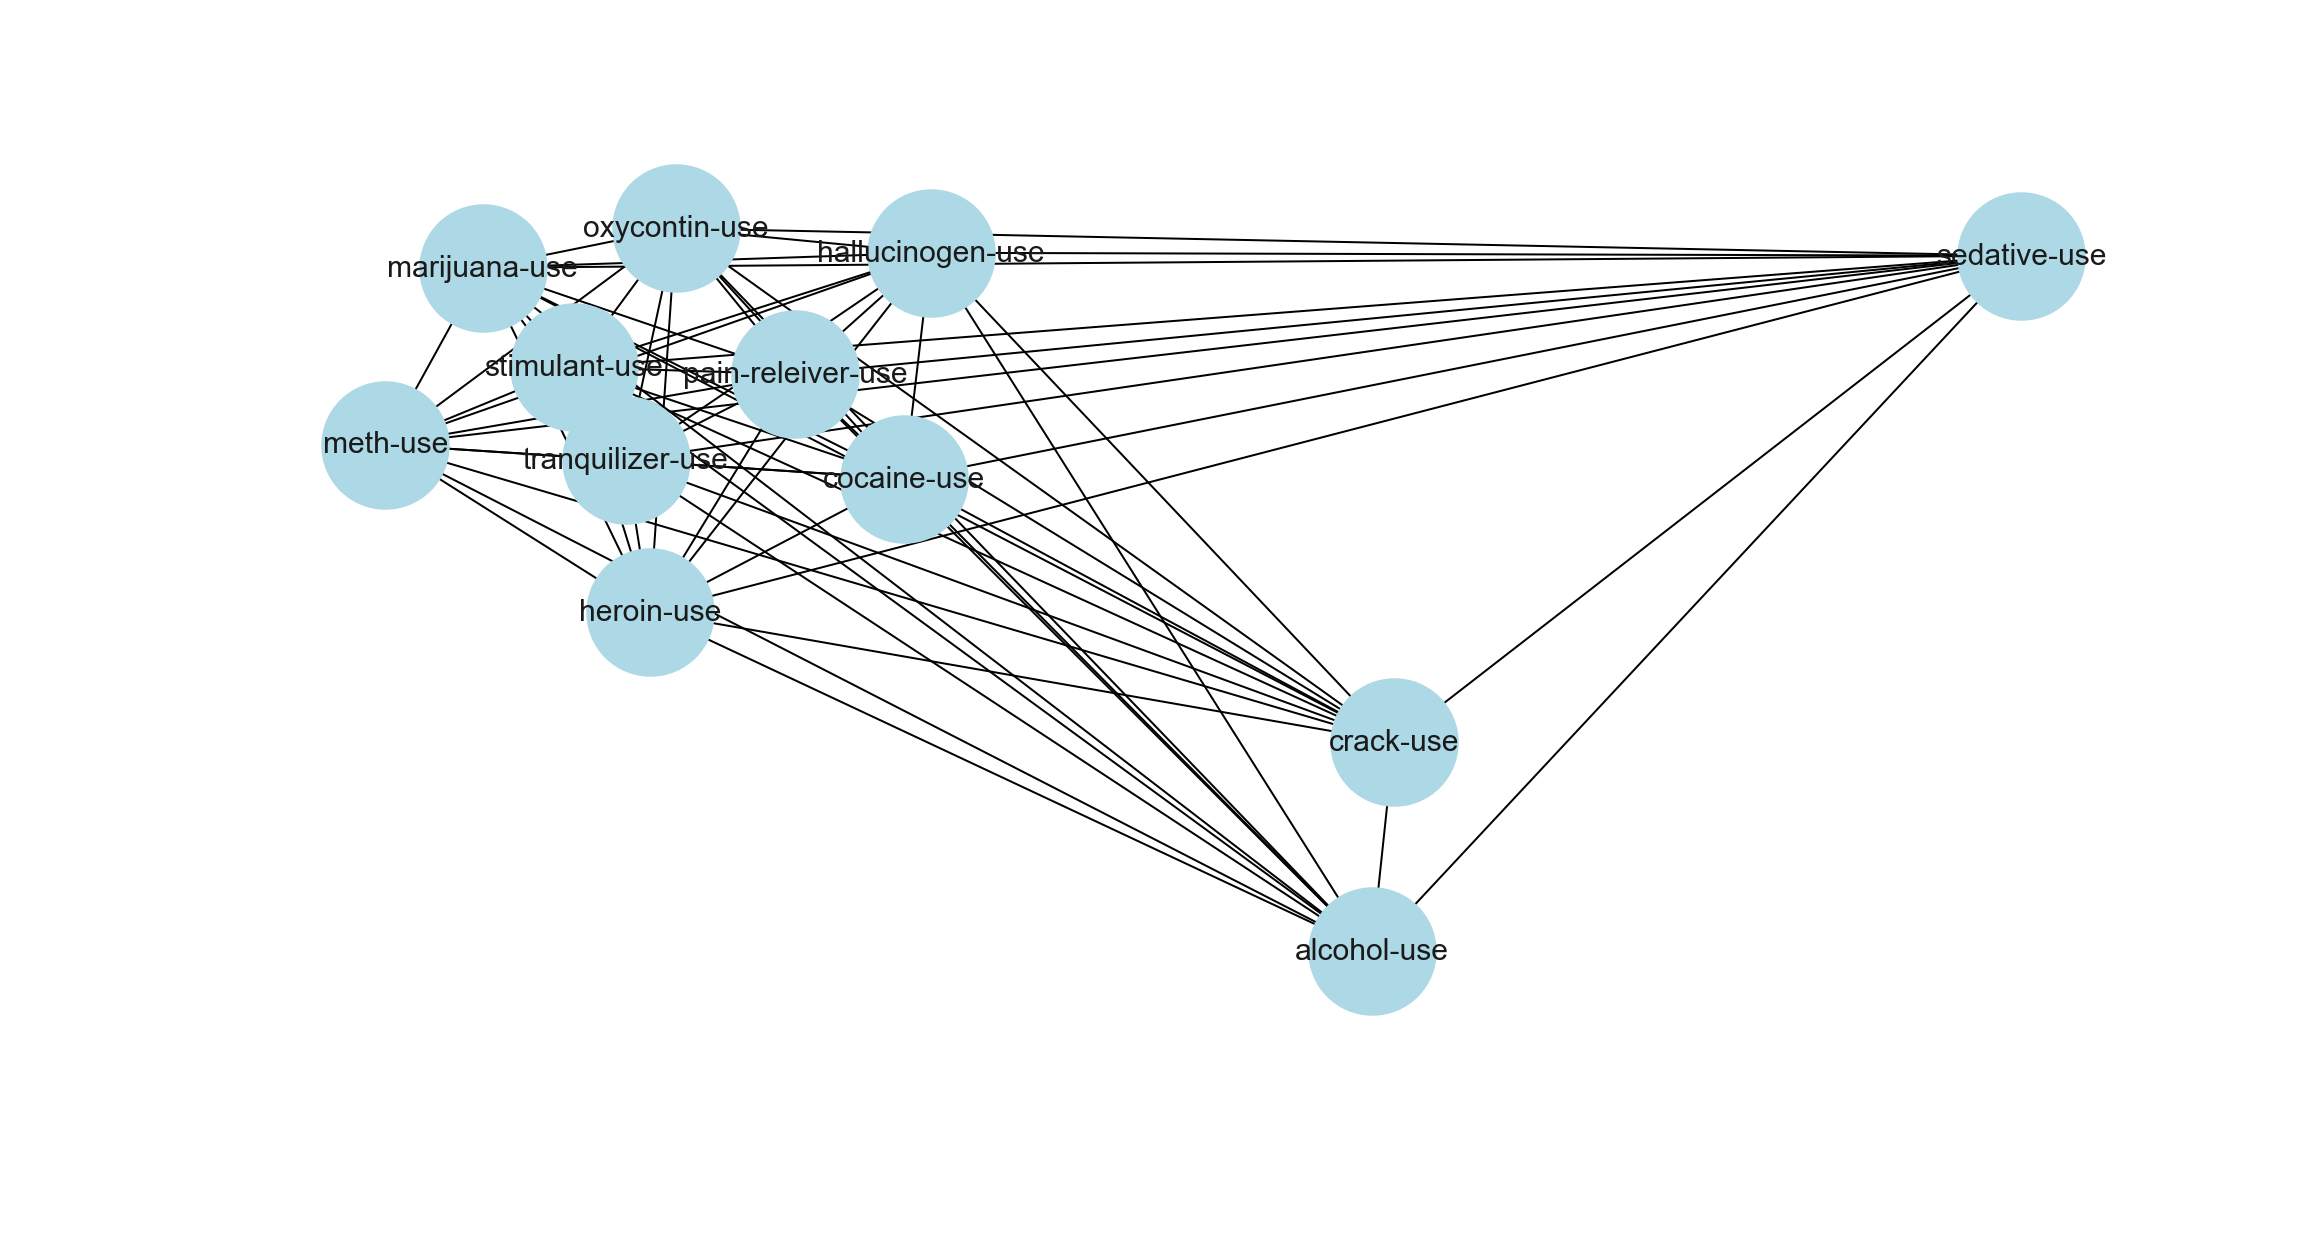

In [35]:
# remove inhalant use and plot again
df_dropped = df_drug_use_corr.drop('inhalant-use', axis=1).drop('inhalant-use', axis=0)
df_dropped[df_dropped < 0.8] = 0
df_dropped[df_dropped >= 0.8] = 1
print(df_dropped.shape)
plot_network_diagram(df_dropped, k=0.5, iterations=20, scale = 0.2);

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [36]:
df_q8 = df_sat_scores_csv['Rate']

<div class = 'alert alert-info'>
<b>Question</b>: Are there outliers in the dataset? Define, in words, how you numerically define outliers.<br/>
<b>Answer</b>: I define outliers as values below 5th percentile and above 9th percentile. The outliers are as shown below.
</div>

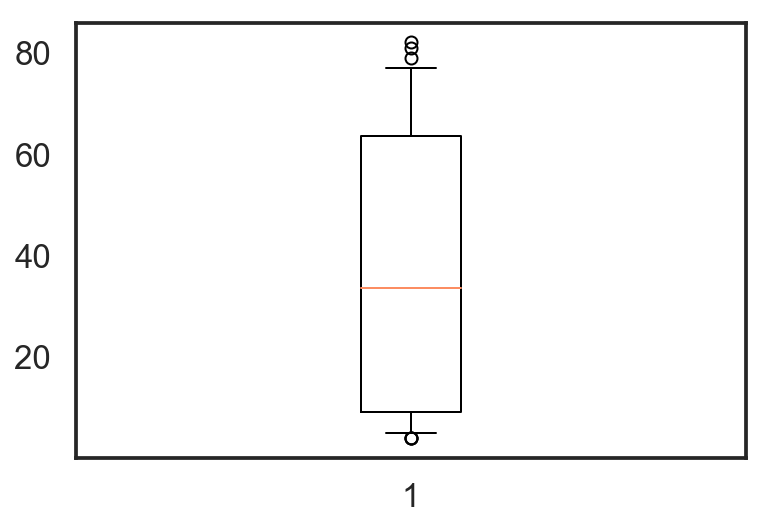

In [46]:
plt.pyplot.boxplot(x=df_q8,whis=[5, 95]);

In [47]:
# Print out the outliers in the dataset
outliers = df_q8[(df_q8 < df_q8.quantile(q=0.05)) | (df_q8 > df_q8.quantile(q=0.95))]
print('The outliers are:')
qf_print(pd.DataFrame(outliers))

The outliers are:


,Rate
0,82
1,81
2,79
48,4
49,4
50,4


In [48]:
df_without_outliers = df_q8.drop(outliers.index)
print('mean decreased by', df_q8.mean()-df_without_outliers.mean())
print('median decreased by',df_q8.median()-df_without_outliers.median())
print('standard deviation decreased by',df_q8.std()-df_without_outliers.std())
print('>There is a significant decrease in standard deviation as the extreme values are removed')

mean decreased by 0.6755852842809347
median decreased by 0.0
standard deviation decreased by 1.9108543187078908
>There is a significant decrease in standard deviation as the extreme values are removed


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [49]:
df_sat_scores_csv[['Verbal','Math']].corr(method = 'pearson')

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


In [50]:
df_sat_scores_csv[['Verbal','Math']].corr(method = 'spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


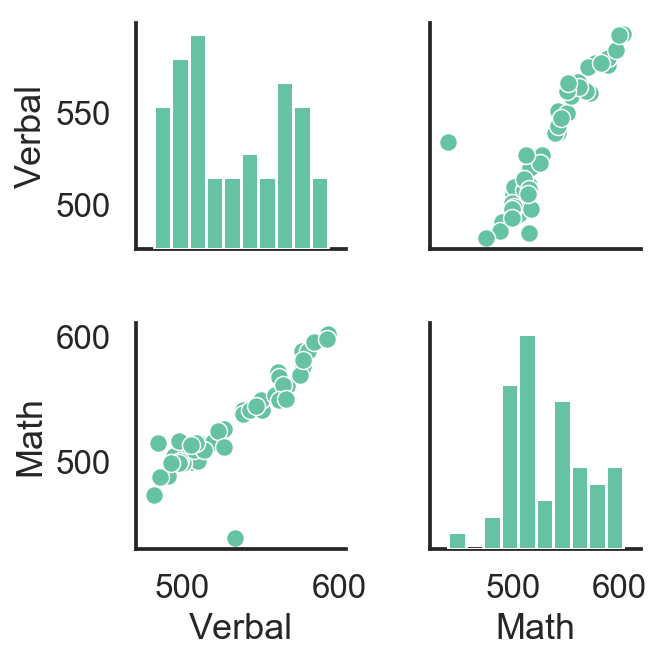

In [51]:
sns.pairplot(df_sat_scores_csv[['Verbal','Math']]);

<div class='alert alert-info'>
<b>Question</b>: How does spearman correlation compare to pearson correlation?<br/>
<b>Answer</b>: The linearity(how straight the line is) of monotonic relationship affects Pearson correlation but not Spearman correlation. </div>

<div class='alert alert-info'>
<b>Question</b>: Describe clearly in words the process of calculating the spearman rank correlation.<br/>
<b>Answer</b>: Square the difference in ranking of correlation values, and divide it by number of values multipled by (number of values squared minus 1). Take 1 minus the calculated value and this is the spearman rank correlation value.
</div>

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [68]:
df_q92 = df_sat_scores_csv.copy()
df_q92_sorted = list(df_q92.sort_values(by='Rate')['Rate'])

def cal_percentile(rate_value):
    return [round(99*(index+1)/(len(df_q92_sorted))) for index, sorted_value in enumerate(df_q92_sorted) if sorted_value == rate_value['Rate']][0]

df_q92['Percentiles'] = df_sat_scores_csv[['Rate']].apply(cal_percentile, axis=1)

print('New column added to dataframe.')
qf_print(df_q92.head())

print('Percentile for California')
qf_print(df_q92[df_q92['State'] == 'CA'][['State','Percentiles']])

New column added to dataframe.


,State,Rate,Verbal,Math,Verbal - Math,Percentiles
0,CT,82,509,510,-1,99
1,NJ,81,499,513,-14,97
2,MA,79,511,515,-4,95
3,NY,77,495,505,-10,93
4,NH,72,520,516,4,91


Percentile for California


,State,Percentiles
23,CA,55


<div class='alert alert-info'>
<b>Question</b>: How is percentile related to the spearman rank correlation?<br/>
<b>Answer</b>: Spearman Rank correlation of Percentile is equivalent to Spearman correlation of actual values. Refer to example below.
</div>

In [78]:
df_q92[['Rate', 'Verbal']].corr(method='spearman')

,Rate,Verbal
Rate,1.000000,-0.833294
Verbal,-0.833294,1.000000


In [77]:
df_q92[['Percentiles', 'Verbal']].corr(method='spearman')

,Percentiles,Verbal
Percentiles,1.000000,-0.833294
Verbal,-0.833294,1.000000


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.